# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [1]:
# Import essential libraries for data manipulation and analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Importing the file porter_data_1.csv

porter_ds = pd.read_csv('/content/drive/MyDrive/Work/MyLearnings/UpGrad/Course 2 - M2 - Linear Regression Assignment - LR Delivery Time Prediction/Delivery_Starter/porter_data_1.csv')
#
porter_ds.info()  # Delete
porter_ds.head()  # Delete


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [4]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

# Convert 'created_at' to datetime type
porter_ds['created_at'] = pd.to_datetime(porter_ds['created_at'])

# Convert 'actual_delivery_time' to datetime type
porter_ds['actual_delivery_time'] = pd.to_datetime(porter_ds['actual_delivery_time'])

porter_ds.info() # Delete

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [5]:
# Convert categorical features to category type

# List of columns to convert
categorical_cols = ['store_primary_category', 'order_protocol', 'market_id']

# Convert  columns to category type
for col in categorical_cols:
    porter_ds[col] = porter_ds[col].astype('category')

# Verify the columns' datatype
porter_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [6]:
# Calculate time taken in minutes
porter_ds.insert(loc=0, column='time_taken', value=(porter_ds.actual_delivery_time - porter_ds.created_at).dt.total_seconds()/60)

#porter_ds['time_taken'] = (porter_ds.actual_delivery_time - porter_ds.created_at).dt.total_seconds()/60


##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [7]:
# Extract the hour and day of week from the 'created_at' timestamp

porter_ds['order_hour'] = porter_ds.created_at.dt.hour


# Create a categorical feature 'isWeekend'

porter_ds['isWeekend'] = porter_ds.apply(lambda curr_row: 1 if curr_row.created_at.weekday() > 4 else 0, axis=1)


In [8]:
# Drop unnecessary columns

porter_ds.drop(axis=1, columns=['created_at'], inplace=True)

In [9]:
# Create a derived column/feature
porter_ds['total_available_dashers'] = porter_ds['total_onshift_dashers'] - porter_ds['total_busy_dashers']
porter_ds.drop(axis=1, columns=['total_onshift_dashers', 'total_busy_dashers'], inplace=True)


#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [10]:
# Define target variable (y) and features (X)

# The derived feature 'time_taken' is the target variable
target_column = 'time_taken'

# The feature columns are (putting everything else in the feature bucket for now)
feature_columns = ['store_primary_category', 'order_protocol',
                   'total_items', 'subtotal', 'num_distinct_items',
                   'min_item_price', 'max_item_price',
                   'total_available_dashers',
                   'total_outstanding_orders', 'distance',
                   'order_hour', 'isWeekend']

# Define the target variable (y)
y = porter_ds[target_column]

# Explicitly select the feature columns
X = porter_ds[feature_columns]

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [11]:
# Split data into training and testing sets

from sklearn.model_selection import train_test_split

# We use the same 'random seed' so that the train & test data-set have the same rows always
np.random.seed(0)
df_train, df_test = train_test_split(porter_ds, train_size = 0.7, random_state = 100)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [12]:
# Define numerical and categorical columns for easy EDA and data manipulation

num_cols = ['time_taken',
            'total_items',
            'subtotal',
            'num_distinct_items',
            'min_item_price',
            'max_item_price',
            'total_available_dashers',
            'total_outstanding_orders',
            'distance']

categorical_cols = ['market_id', 'store_primary_category',
                    'order_protocol', 'order_hour', 'isWeekend']



##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

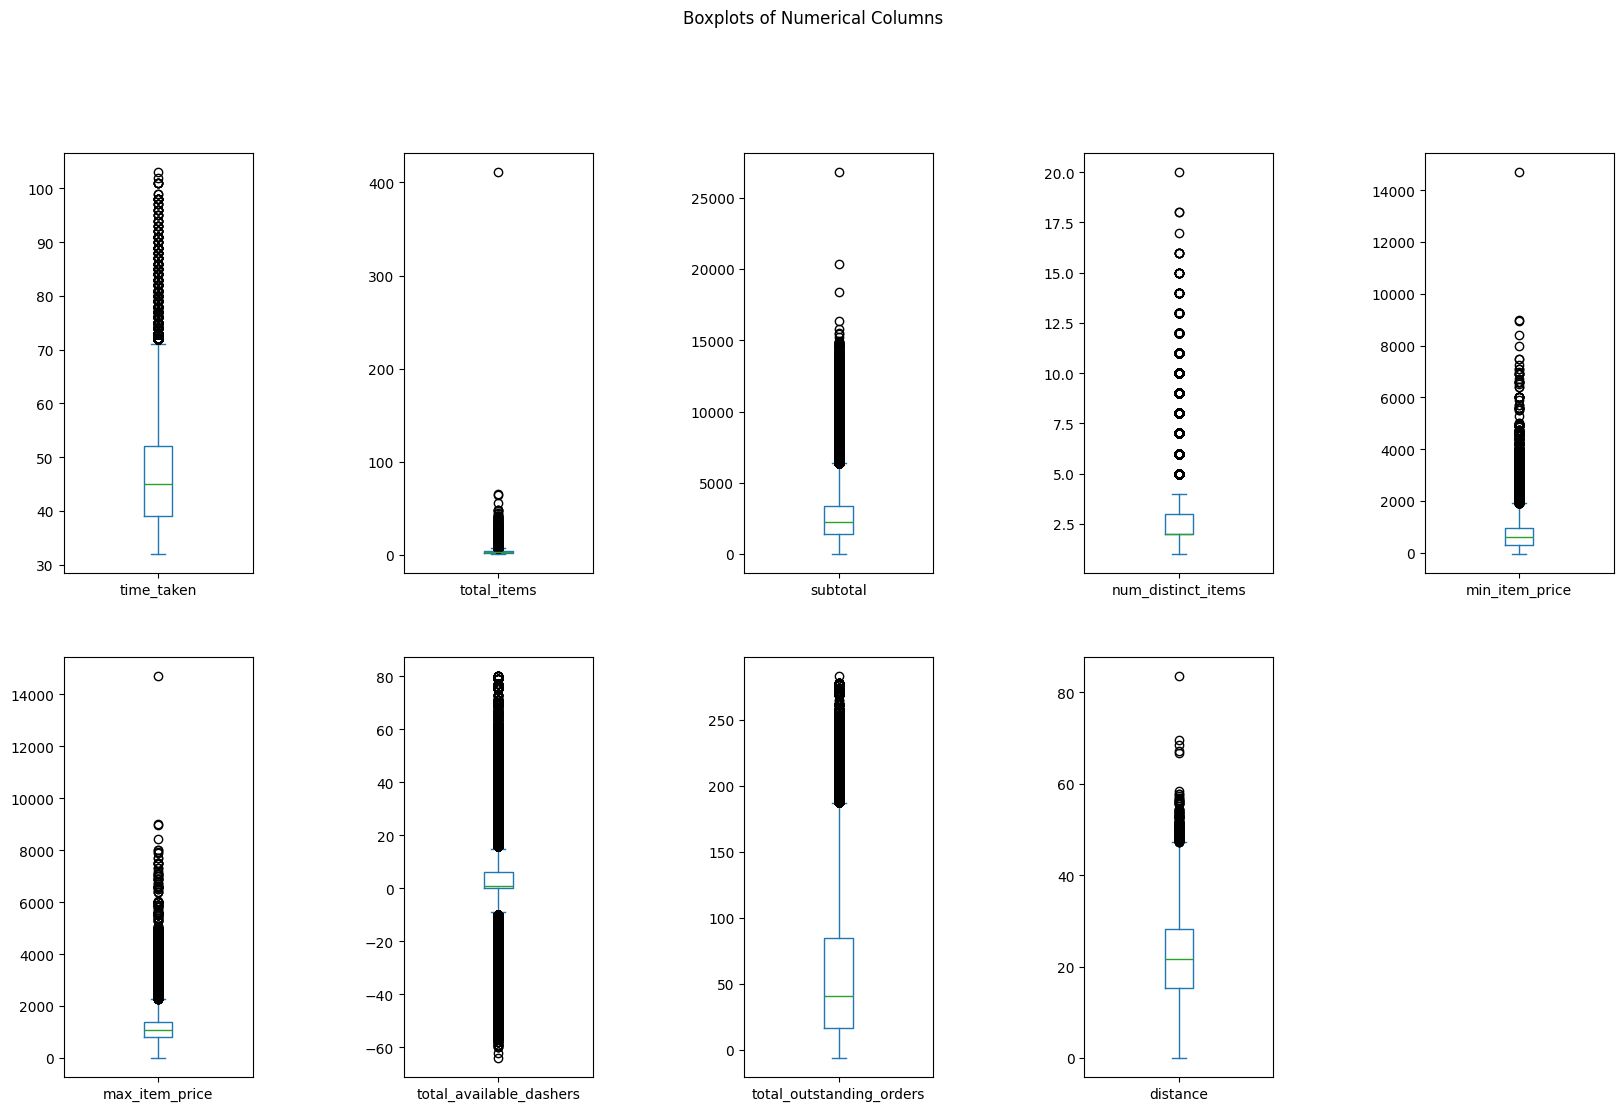

In [13]:
# Plot distributions for all numerical columns

#get number of columns
no_of_cols = len(num_cols)

df_train[num_cols].plot(kind='box',
                        subplots=True,
                        layout=(2, int((no_of_cols+1)/2)),
                        sharex=False,
                        sharey=False,
                        figsize=(20, 12))

# Adjust spacing between subplots for readability
plt.subplots_adjust(wspace=0.8)

 # Add main title
plt.suptitle('Boxplots of Numerical Columns', y=1)
plt.show()


# We can use the histplot in the extra code cell added below
# as well for visualization of spread and skewness of each column

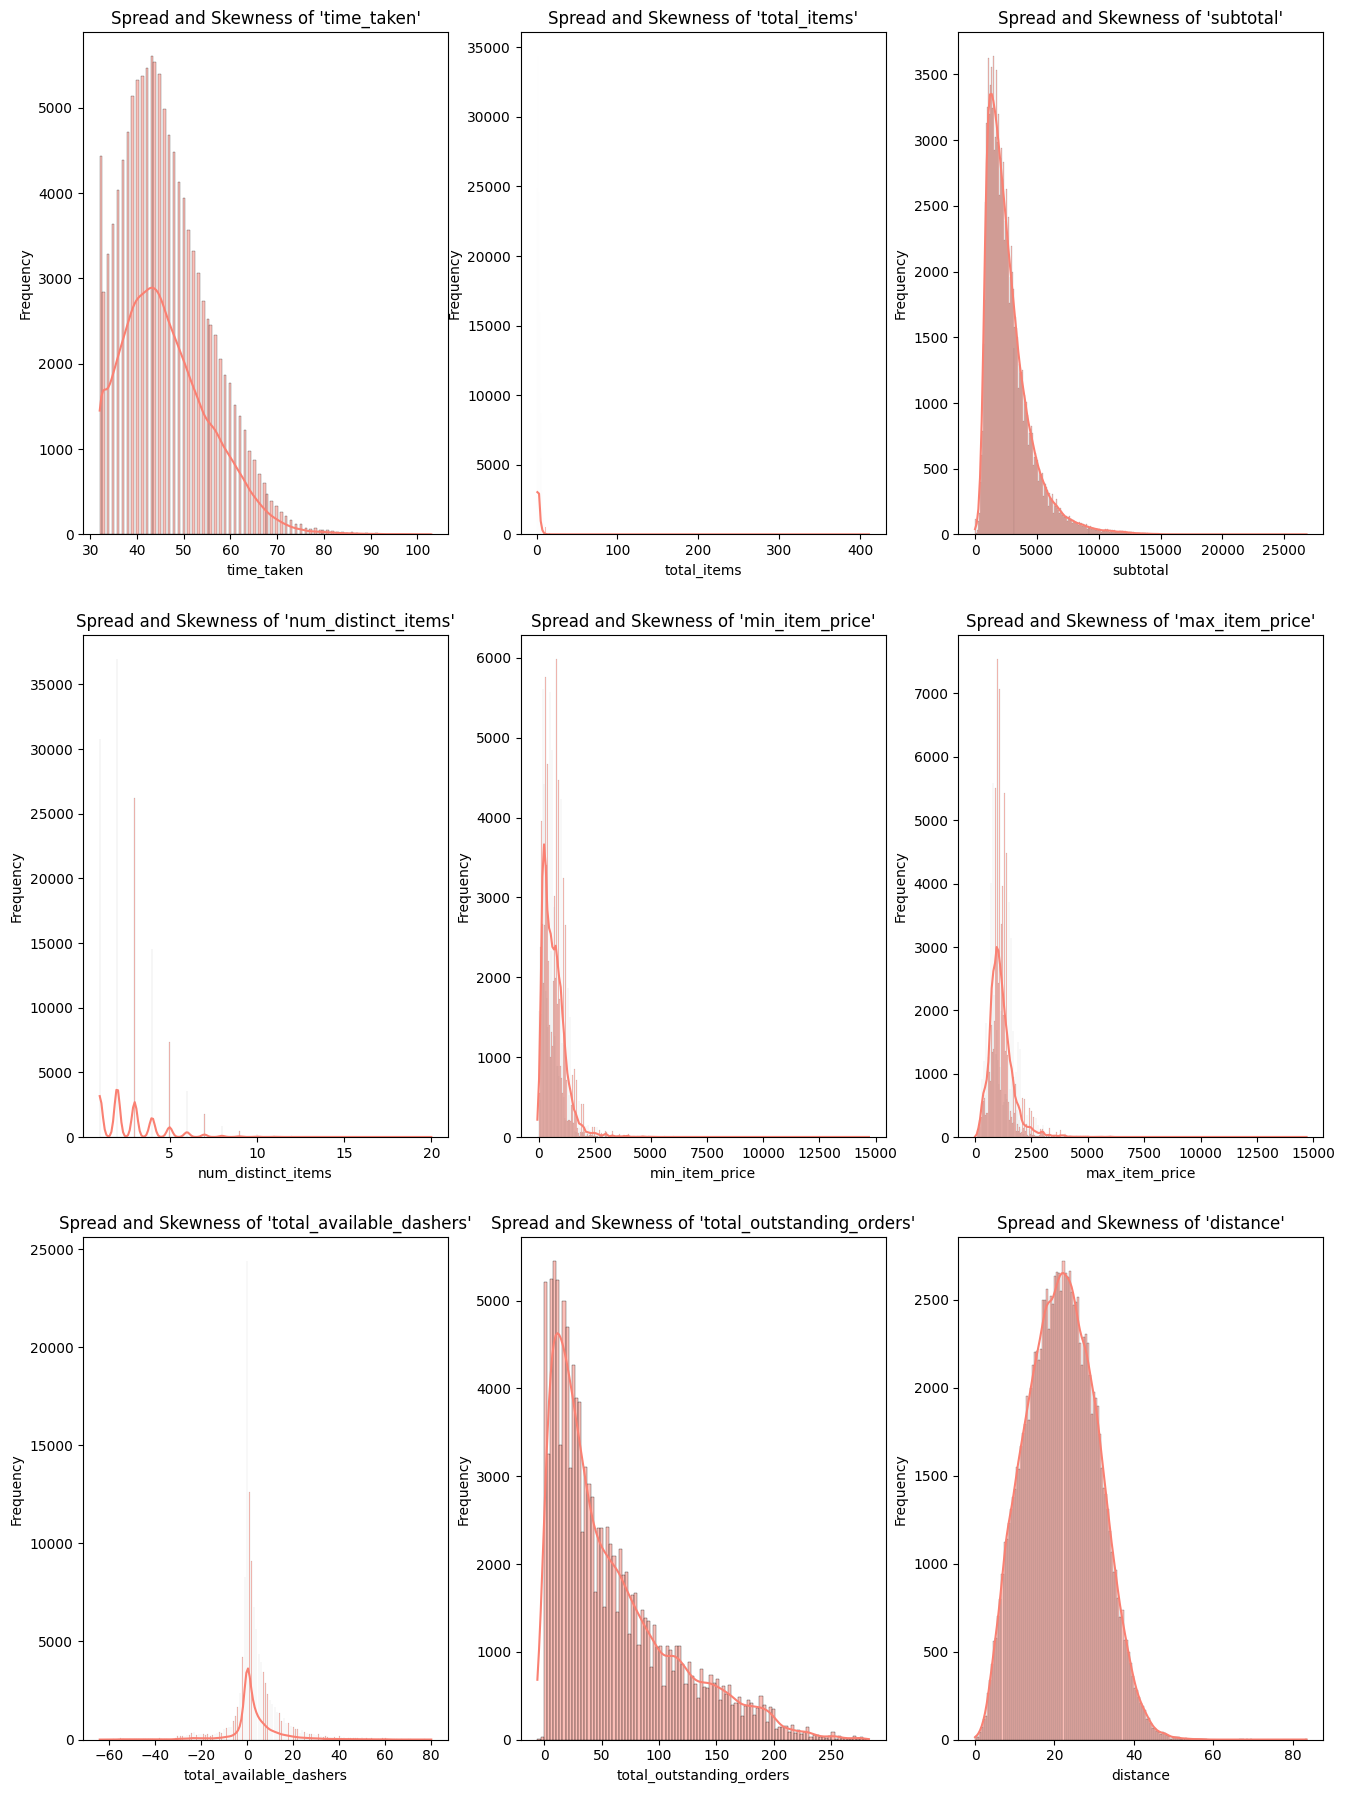

In [14]:
# Create a function to plot the numerical variables
def plot_num_col_distribution(df_param, col_names) :

  num_of_rows = 4
  num_of_cols = 3
  tot_vars = len(df_param[col_names].columns)
  fig, axes = plt.subplots(num_of_rows, num_of_cols, figsize=(16, 5 * num_of_rows+10))


  # Flatten the axes array for iteration without using rows and cols
  axes = axes.flatten()

  for i, col in enumerate(df_param[col_names].columns) :

    sns.histplot(df_param[col_names][col], kde=True, ax=axes[i], color='salmon')

    axes[i].set_title(f'Spread and Skewness of \'{col}\'')
    axes[i].set_ylabel('Frequency')


  # Hide any unused subplots spaces
  for j in range(tot_vars, len(axes)):
      fig.delaxes(axes[j])

  plt.show()

# Call the method for training data.
plot_num_col_distribution(df_train, num_cols)

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

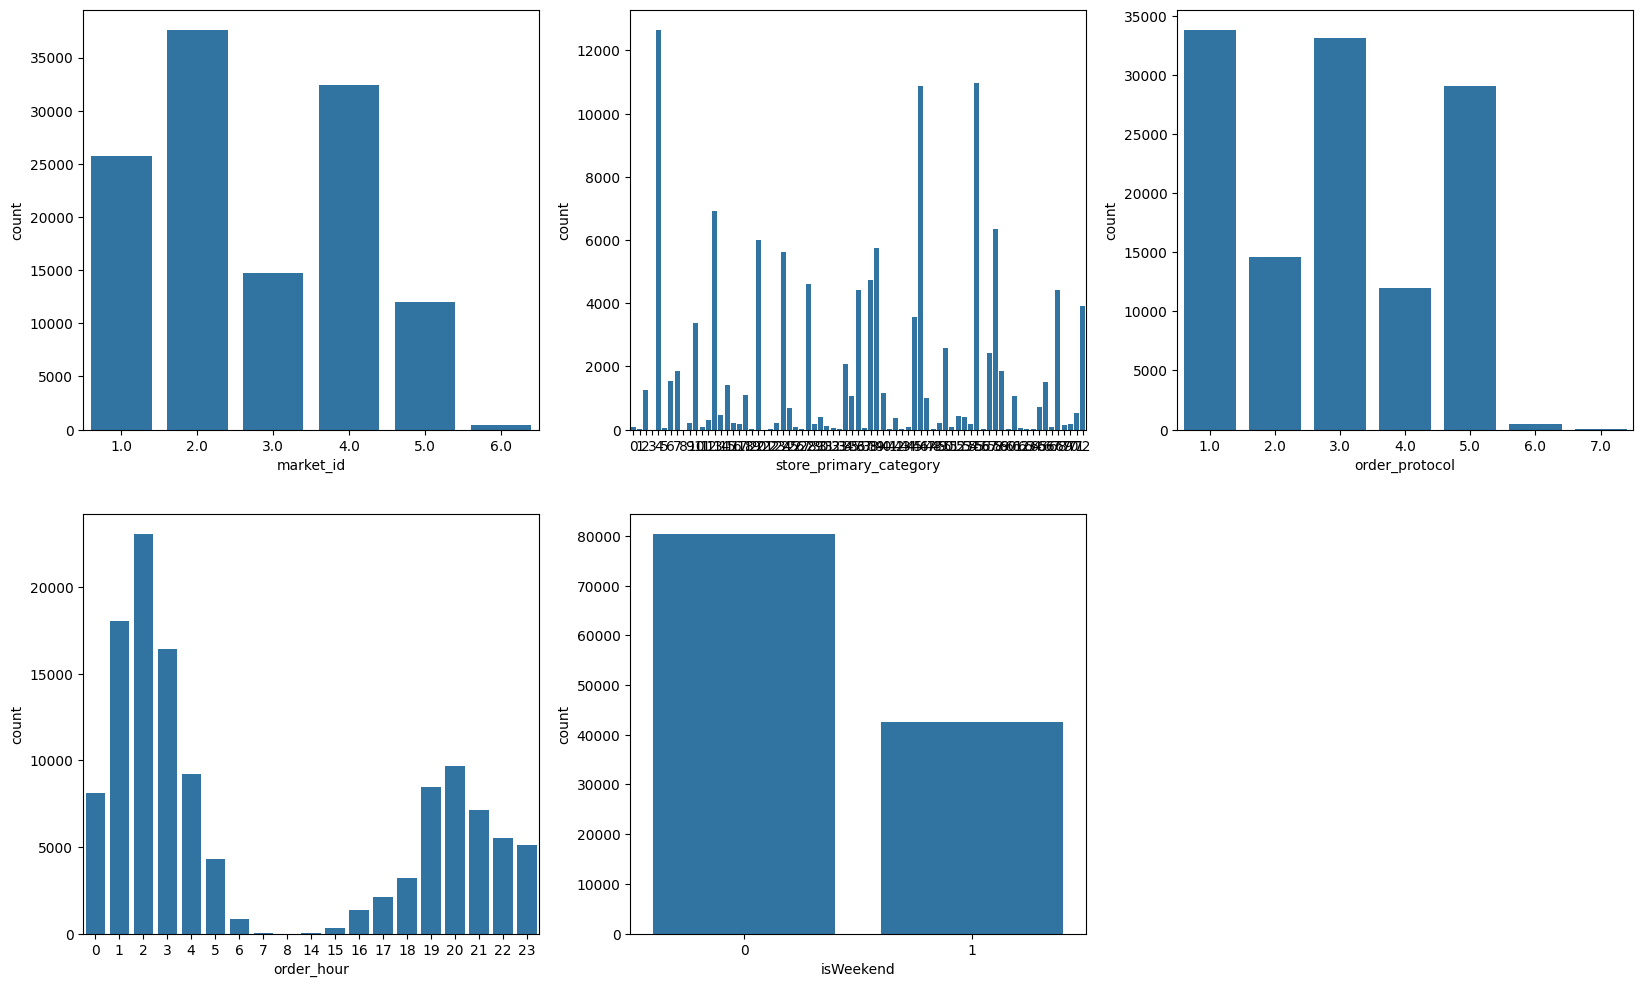

In [15]:
# Distribution of categorical columns

# Create a function to plot the numerical variables
def plot_categorical_col_distribution(df_param, col_names) :

  plt.figure(figsize=(20, 12))
  plt.subplot(2,3,1)
  sns.countplot(x='market_id', data=df_param[col_names])

  plt.subplot(2,3,2)
  sns.countplot(x='store_primary_category', data=df_param[col_names])

  plt.subplot(2,3,3)
  sns.countplot(x='order_protocol', data=df_param[col_names])

  plt.subplot(2,3,4)
  sns.countplot(x='order_hour', data=df_param[col_names])

  plt.subplot(2,3,5)
  sns.countplot(x='isWeekend', data=df_param[col_names])

  plt.show()

# Call the function for categorical columns
plot_categorical_col_distribution(df_train, categorical_cols)

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

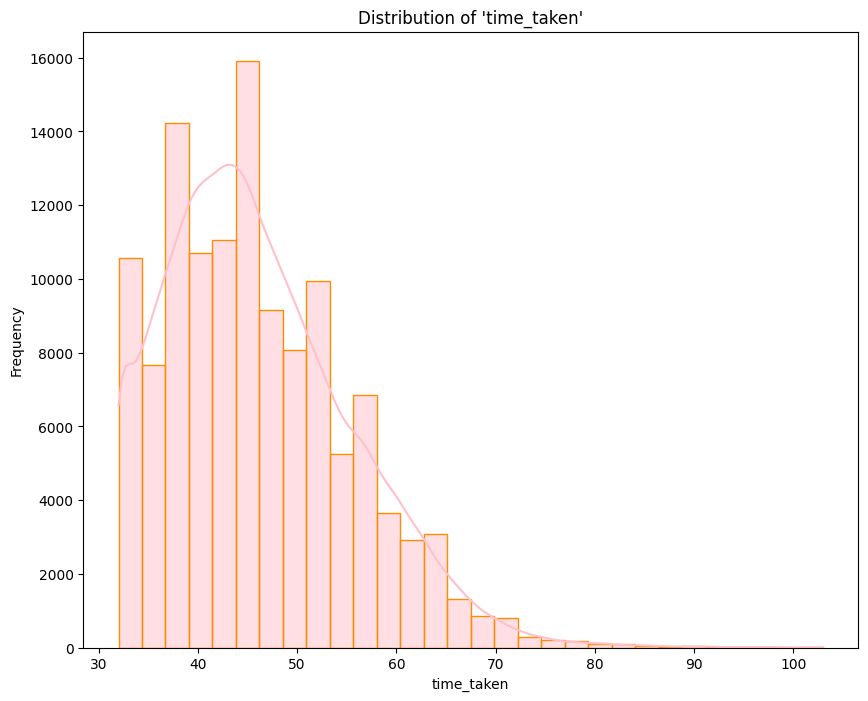

In [16]:
# Distribution of time_taken

# define method to plot target variable distribution
def plot_target_distribution(df_param, target_col_name) :

  plt.figure(figsize=(10, 8))

  # plt.hist(df_train['time_taken'], bins=80, color='pink', edgecolor='darkorange')
  sns.histplot(df_param[target_col_name],
              bins=30,
              kde=True,
              color='pink',
              edgecolor='darkorange',
              label='Histogram with KDE')

  plt.xlabel(target_col_name)
  plt.ylabel('Frequency')
  plt.title(f'Distribution of \'{target_col_name}\'')
  plt.show()

# Call the method
plot_target_distribution(df_train, 'time_taken')

# The target variable 'time_taken' is positively skewed.

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features

sns.pairplot(df_train)
plt.show()

In [ ]:
# Show the distribution of time_taken for different hours


# We can use seaborn's displot to visualize this
sns.displot(data=df_train, x='time_taken', col='order_hour', kde=True, height=4, col_wrap=4)


plt.suptitle('Distribution of \'time_taken\' by \'order_hour\' (Histograms)', y=1.02)
plt.show()

In [ ]:
df_train.info()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

In [ ]:
# Plot the heatmap of the correlation matrix

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [ ]:
# Drop 3-5 weakly correlated columns from training dataset

df_train = df_train.drop(columns='min_item_price')
df_train = df_train.drop(columns='store_primary_category')
df_train = df_train.drop(columns='actual_delivery_time')

num_cols = ['time_taken',
            'total_items',
            'subtotal',
            'num_distinct_items',
            'max_item_price',
            'total_available_dashers',
            'total_outstanding_orders',
            'distance']

categorical_cols = ['market_id', 'order_protocol', 'order_hour', 'isWeekend']


In [ ]:
df_train.info()

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

In [ ]:
# Boxplot for time_taken
# Boxplot of all the numerical columns

#get number of columns
no_of_cols = len(num_cols)

df_train[num_cols].plot(kind='box',
                        subplots=True,
                        layout=(3, int((no_of_cols+2)/3)),
                        sharex=False,
                        sharey=False,
                        figsize=(20, 16))

# Adjust spacing between subplots for readability
plt.subplots_adjust(wspace=0.8)

 # Add main title
plt.suptitle('Boxplots of Numerical Columns', y=1)
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [ ]:
# Handle outliers using IQR method

def remove_outliers(df_param, col_names) :

  for col_name in df_param.columns :

    if col_name in col_names :

      Q1 = df_param[col_name].quantile(0.25)
      Q3 = df_param[col_name].quantile(0.75)

      IQR = Q3 - Q1

      lower_bound = Q1 - (1.5 * IQR)
      upper_bound = Q3 + (1.5 * IQR)

      df_no_outliers = df_param[(df_param[col_name] >= lower_bound) & (df_param[col_name] <= upper_bound)]

  return df_no_outliers

# Call the method for training data
df_train = remove_outliers(df_train, num_cols)


In [ ]:
df_train.info()
# 121798

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [ ]:
# Define numerical and categorical columns for
# easy EDA and data manipulation for test data


num_cols = ['total_items', 'subtotal',
            'num_distinct_items', 'min_item_price',
            'max_item_price', 'total_available_dashers',
            'total_outstanding_orders',
            'distance', 'time_taken']

categorical_cols = ['market_id', 'store_primary_category',
            'order_protocol', 'order_hour', 'isWeekend']


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [ ]:
# Plot distributions for all numerical columns for test data

plot_num_col_distribution(df_param=df_test, col_names=num_cols)

##### **4.1.2**
Check the distribution of categorical features

In [ ]:
# Distribution of categorical columns for test data

plot_categorical_col_distribution(df_test, categorical_cols)

##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [ ]:
# Distribution of time_taken for test data

# Call the method
plot_target_distribution(df_test, 'time_taken')

# Here too, the target variable 'time_taken' is positively skewed.

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [ ]:
# Scatter plot to visualise the relationship between
# time_taken and other features for test data

sns.pairplot(df_test)
plt.show()

#### **4.3** Drop the columns with weak correlations with the target variable

In [ ]:
# Drop the weakly correlated columns from test dataset


# cmap colours 'viridis', 'plasma', 'inferno', 'magma', 'Blues', 'Greens', 'Reds', 'YlGnBu'.
plt.figure(figsize = (16, 10))
sns.heatmap(df_test.corr(), annot = True, cmap="Greens")
plt.show()


# Based on weak correlation of feature columns with target column,
# following columns are dropped
df_test = df_test.drop(columns='min_item_price')
df_test = df_test.drop(columns='store_primary_category')
df_test = df_test.drop(columns='actual_delivery_time')
# df_test = df_test.drop(columns='market_id')

num_cols = ['total_items', 'subtotal',
            'num_distinct_items', 'max_item_price',
            'total_available_dashers',
            #'total_onshift_dashers', 'total_busy_dashers',
            'total_outstanding_orders',
            'distance', 'time_taken']

categorical_cols = ['order_protocol', 'order_hour', 'isWeekend', 'market_id']


## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [ ]:
# Import libraries
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

import sklearn.metrics as metrics
import sklearn.linear_model as lm
import sklearn.feature_selection as fs
import sklearn.ensemble as ens

from statsmodels.stats.outliers_influence import variance_inflation_factor


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [ ]:
df_train.info()
df_train.head()

In [ ]:

num_cols = ['time_taken',
            'total_items',
            'subtotal',
            'num_distinct_items',
            'max_item_price',
            'total_available_dashers',
            #'total_onshift_dashers', 'total_busy_dashers',
            'total_outstanding_orders',
            'distance']

def feature_scaling_numerical(df_param, col_names) :

  # Apply scaling to the numerical columns
  scaler = MinMaxScaler()

  df_new = pd.DataFrame()
  # Apply scaler() to numerical columns
  df_param[col_names] = scaler.fit_transform(df_param[col_names])
  return df_param

# Call the function for training data
df_train_scaled = feature_scaling_numerical(df_train.copy(deep=True), num_cols)


In [ ]:
df_train_scaled.head()

In [ ]:

df_train.head()

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [ ]:
# Create/Initialise the model

y_train = df_train_scaled.pop('time_taken')
X_train = df_train_scaled

num_cols = ['time_taken',
            'total_items',
            'subtotal',
            'num_distinct_items',
            'min_item_price',
            'max_item_price',
            'total_available_dashers',
            #'total_onshift_dashers', 'total_busy_dashers',
            'total_outstanding_orders',
            'distance']

categorical_cols = ['market_id', 'store_primary_category',
            'order_protocol', 'order_hour', 'isWeekend']



In [ ]:
X_train.head()

In [ ]:
# Train the model using the training data (First and simple Model)

# Add a constant
X_train_sm = sm.add_constant(X_train)

# Create the first fitted model with all variables
lr = sm.OLS(y_train, X_train_sm)

# fit the model
lr_model = lr.fit()


In [ ]:
print(lr_model.summary())

In [ ]:
# Make predictions

y_train_timetaken_predicted = lr_model.predict(X_train_sm)

In [ ]:
# Plot the errors and analyze its distribution
fig = plt.figure()

warnings.filterwarnings('ignore')

# Plot the errors
sns.distplot((y_train - y_train_timetaken_predicted), bins = 20)

# Plot the errors
#sns.displot((y_train - y_train_timetaken_predicted), bins = 20)

# Set the heading for the plot
fig.suptitle('Error Terms', fontsize = 12)
plt.xlabel('Errors', fontsize = 12)
plt.show()

In [ ]:
# Find results for evaluation metrics

# MEA(Mean Absolute Error): The average of the absolute
# differences between predicted and actual values.
mae = metrics.mean_absolute_error(y_train, y_train_timetaken_predicted)

# MSE (Mean Squared Error): The average of the squared
# differences between predicted and actual values.
# Penalizes larger errors more heavily.
mse = metrics.mean_squared_error(y_train, y_train_timetaken_predicted)

# Get r2
r2 = metrics.r2_score(y_train, y_train_timetaken_predicted)


In [ ]:
print('mae=',mae)
print('mse=',mse)
print('r2=',r2)

**Note :** that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [ ]:
# Print the simple model summary for reference
print('First and simple Model Summary', '\n******************************\n', lr_model.summary())

In [ ]:

# ######### METHOD 'get_VIFs' #########

def get_VIFs(xtrain) :

  # Calculate the VIFs for the new model

  # Create an empty DF
  vif = pd.DataFrame()
  X = xtrain

  # Add column names to the DF
  vif['Features'] = X.columns

  # calculate and add VIF for each column
  vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  # Round off VIFs
  vif['VIF'] = round(vif['VIF'], 2)

  # Sort in Descending order of VIFs
  vif = vif.sort_values(by = "VIF", ascending = False)

  return vif

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:

# get the estimator model
est_lm = LinearRegression()

# fit the model
est_lm.fit(X_train, y_train)

# initialize the feature selector to select features
selector = RFE(est_lm, n_features_to_select=9, step=1)

# fit the model
selector.fit(X_train, y_train)

selected_features_indices = selector.get_support(indices=True)

print(X_train.columns[selected_features_indices])


In [ ]:
# Build the final model with selected number of features

# Using the selected features, build a new model

X_train_selected_features = X_train[X_train.columns[selected_features_indices]]

# Add a constant
X_train_sm_RFE = sm.add_constant(X_train_selected_features)

# Create the first fitted model with all variables
lr_RFE = sm.OLS(y_train, X_train_sm_RFE)

# fit the model
lr_model_RFE = lr_RFE.fit()


In [ ]:
print(lr_model_RFE.summary())

print('\n\n', get_VIFs(X_train_sm_RFE))

**NOTE** :
#### As VIFs of - are quite high, we will eliminate them one by one and compare stats. As 'total_onshift_dashers' has high VIF, lets eliminate it manually and rebuild the model. This feedback from the model was taken and a derived feature was introduced and 2 features were removed initially itself (code changed and does not appear in this notebook anymore)

 **NOTE** :
#### On removing 2 features with quite high VIFs, we introduced a change in p-value of 'total_items', but it is within bearable range.

#### Also the R2 of the whole model kept on decreasing from ~81% and came down significantly to ~52%  

#### Now we may either take the RFE with 8 features, or do some manual feature elimination (which resulted in lower inter-feature relationship), but low R2.
##### (*This part is currently not in the notebook, as it was getting very confusing, hence it has been removed and only final code is present*)

In [ ]:
# Make predictions on training data

y_train_predicted_REF = lr_model_RFE.predict(X_train_sm_RFE)

In [ ]:
# Plot the errors and analyze its distribution for training data
fig = plt.figure()

# Plot errors
sns.distplot((y_train - y_train_predicted_REF), bins = 20)

# Heading
fig.suptitle('Error Terms for Training Data', fontsize = 12)
plt.xlabel('Errors', fontsize = 12)
plt.show()

**Note:** It seems to be a uniformly distributed error-residue, with a r-squared of '0.607'. Hence this model can explain 60% of variance in the target variable.

In [ ]:
# Separate X and y components of test data

# Get numerical column names
all_sel_cols = X_train_selected_features.columns.to_list()
new_num_cols = [item for item in all_sel_cols if item in num_cols]
new_num_cols.append('time_taken') # As time_taken needs to be scaled as well


# Remove outliers from test data
df_test = remove_outliers(df_test, new_num_cols)


# perform scaling of numerical features
df_test_scaled = feature_scaling_numerical(df_test, new_num_cols)

y_test = df_test_scaled.pop('time_taken')
X_test = df_test_scaled


# Select selected features only for the test data as well
X_test_RFE = df_test_scaled[df_test_scaled.columns[selected_features_indices]]


# Add a constant
X_test_sm_RFE = sm.add_constant(X_test_RFE)

In [ ]:
# Making predictions using the final model on test data

y_test_pred_RFE = lr_model_RFE.predict(X_test_sm_RFE)

In [ ]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred_RFE)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 14)
plt.ylabel('y_pred', fontsize = 16)

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

In [ ]:
df_test_scaled.head()

In [ ]:
# Perform residual analysis using plots like residuals vs predicted values,
# Q-Q plot and residual histogram

# Calculate residual for test data
y_test_residual = y_test - y_test_pred_RFE
#y_res = lr_model_RFE.resid

# Plotting residuals vs predicted values
fig = plt.figure()
plt.scatter(y_test_residual, y_test_pred_RFE)
fig.suptitle('y_pred vs residuals', fontsize = 20)
plt.xlabel('y_pred', fontsize = 14)
plt.ylabel('residuals', fontsize = 16)


In [ ]:
# Plotting residual histogram

plt.hist(y_test_residual, bins=20, edgecolor='lightgreen')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

In [ ]:
# Plotting Q Q plot
sm.qqplot(y_test_residual, line='45')
plt.title('Q-Q Plot of residue of Test Data')
plt.show()

[link text](https://)[Your inferences here:] [Add link to the section (in the report file) where you describe about this]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [ ]:

#df_train_scaled1 = df_train_scaled.copy(deep=True)
#coef_scaled, intcpt_scaled = feature_coef_analysis(df_train_scaled1, y_train)

model = LinearRegression()
model.fit(df_train_scaled, y_train)


# Accessing coefficients
coefficients = model.coef_
feature_names = df_train_scaled.columns

# Creating a DataFrame for better readability
coeff_df_scaled = pd.DataFrame({'Feature': feature_names, 'Coefficient_Scaled': coefficients})

intcpt_scaled = model.intercept_

print(coeff_df_scaled)
print(f"\nIntercept: {intcpt_scaled}")

In [ ]:
# Compare the scaled vs unscaled features used in the final model

cols = df_train.columns
cols = [col for col in cols if col != 'time_taken']


model = LinearRegression()
model.fit(df_train[cols], df_train['time_taken'])


# Accessing coefficients
coefficients = model.coef_
feature_names = cols

# Creating a DataFrame for better readability
coeff_df_unscaled = pd.DataFrame({'Feature': feature_names, 'Coefficient_Unscaled': coefficients})

intcpt_unscaled = model.intercept_

print('Scaled Feature Co-efficiants')
print('============================')

print(coeff_df_scaled)
print(f"\nIntercept: {intcpt_scaled}")


print('\n\nUnscaled Feature Co-efficiants')
print('==============================')

print(coeff_df_unscaled)
print(f"\nIntercept: {intcpt_unscaled}")


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [ ]:
# Analyze the effect of a unit change in a feature, say 'total_items'



Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

**NOTE** : For unscaled data the features that impact the dependant variable the most are-
 - isWeekend
 - order_protocol
 - num_distinct_items
 - total_available_dashers

For scaled data, the features impacting the most are
 - distance
 - subtotal
 - total_outstanding_orders
 - total_items

Thus we see a totally different outcome for the model when using scaled vs unscaled predictor features.

Using scaled features is better as it minimises the impact for features which range in higher vales, that those that range in lower limits.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
> There were 5 Categorical columns/variables in the data. As correlation of 'market_id', 'store_primary_category' and 'actual_delivery_time' to the target variable was very low, they were initially removed from the dataset.




---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
> test_size = 0.2 refers to splitting the available dataset into two - 'train' and 'test' data, where test data would comprise of 20% of the total available data/records.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
> Predictor variable/column 'distance' has the highest correlation of (0.46).



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

> I used the IQR method to detect and remove outliers from the data.

All records corrsponding to features values that were beyond 1.5 times the IQR on both sides of the mean were removed.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
> The top 3 features significantly affecting deivery time are -
>> - distance,
>> - subtotal and
>> - total_outstanding_orders



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
> Linear Regression is a supervised machine learning techniques used to predict a target feature, which is continous in nature, based on one or more input features.

>The baseline for this algorithm is that it assumes the existence of a linear relationship between the input features (also called independent variables) and the target ( also known as dependent variable).

>The primary task is to find the best-fitting line for the data(mostly historical) that minimizes the difference between predicted and actual values, in other words that minimises the error or residue.

> The model is represented by the linear equation

>>> y = c + mx

> which can be written in more official statistical words as
>>> Y = $\beta$$_0$ + $\beta$$_1$X


This algorithm has some basic assumptions:
 - features and target variables have a linear relationship.
 - Independence of observations.
 - Constant variance of residuals (homoscedasticity).
 - Residuals are uniformaly distributed around '0' (for inference purposes).
 - There is no or minimal multicollinearity among predictors (in multiple linear regression).

> The algorithm's primary technique is to find the optimal coefficients, by minimizing a cost function typically one from the given list
 1. Mean Squared Error, (most widely used)
 2. Root Mean Squared Error (RMSE),
 3. Mean Absolute Error (MAE)

 >The values of these co-efficients is chosen such that the error between predicted and actual values is minimised.

>> Steps involved in the algorithm -
>>> 1. *Data Preparation*: Clean and preprocess data (handle missing values, scale features if needed).
>>> 2. *Model Fitting*: Estimate the coefficients by minimizing a cost function, typically Mean Squared Error on the given dataset.
>>> 3. *Prediction*: Next using the fitted model, we predict the target feature for untrained data(test data/ new data)
>>> 4. *Evaluation*: The last step in the algorithm is model evalution. We evaluate the model's performance by calculating metrics like R-squared, Mean Squared Error, or Mean Absolute Error


**Applications**: Predicting house prices, stock prices, sales forecasts, impact of a car's weight on its miles per gallon rating:, etc.




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>Some basic differences are outlined in the table below.



| Simple Linear Regression | Multiple Linear Regression ||
|---|---||
| Involves one predictor and one predicted feature | Involves multiple predictors and one target feature.2 ||
| Single predictor variable | Multiple predictor variables ||
| Easier to compute, interpret and visualize.| More complex, requires more computational effort and feature analysis.
| Since one predictor, hence no relationship among predictors exists. | Requires checking for multicollinearity.||
| Simple regression is a 2D line. | Multiple Regression is harder to visualize (hyperplane in n-dimensional space) ||



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
> In  Linear Regression, the cost function measures how well the model fits the given data by measuring the error between predicted values and actual values. The most commonly used cost function is MSE (*Mean Squared Error*), which calculates the average of squared differences between *predicted* and *actual* values. The primary goal of the model is to find the coefficients of the Linear Regression line that minimizes this error, ensuring the model’s predictions are as close as possible to the actual values.

Any of the following methods can be used to minimise the cost function-
1. Ordinary Least Squares (OLS) - by minimizing the Sum of Squared Residuals (SSR)
2. Gradient Descent - This method, iteratively updates model parameters in the direction of the steepest descent to find the lowest point of the function.
3. Ridge Regression or stochastic gradient descent for complex cases.





---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

><u>Overfitting </u> - This occurs when the model learns the training data too well, including noise and outliers, resulting in poor generalization to new data.

> - High accuracy on training data but low accuracy on test data.
> - The model is very complex containing a large number of features.
> - It is quite sensitive to small changes in training data.

><u>Underfitting </u> - The model is too simple to capture basic underlying patterns in the data, resulting in poor performance on both training and test data.

> - Low accuracy on both training and test data.

> - Fails to capture complexity of data.

> - Is very simple in design and overlooks important relationship or predictor behaviours.




---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
> A residual plot is a scatter plot of *residuals* vs *predicted* values or a feature, where residual is the difference between actual and predicted values. They help in evaluating if the primary assumptions of the Linear Regression met in the model.

If the residuals show uniform distribution around 0, with no discernible pattern, then its a good Linear model.

Residuals have constant variance across all predicted values, hence indicated homoscedasticity.

No systematic patterns or trends in residuals thereby indicating that the feature(s) is(are) Independent